In [1]:
import seaborn as sns

%matplotlib inline

In [2]:
# use built-in seaborn dataset
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\sholv\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


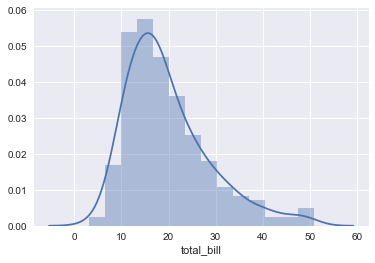

In [3]:
# distribution plot - distplot - shows distribution of a univariate (one-variable) set of observations

sns.distplot(tips['total_bill'])

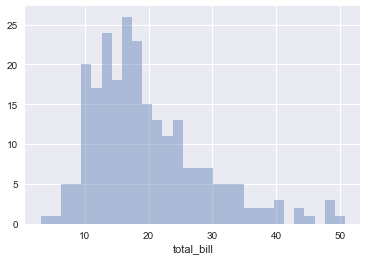

In [4]:
# remove kde line to leave just a simple histogram
# bins = number of value bins to display

sns.distplot(tips['total_bill'], kde=False, bins=30)

C:\Users\sholv\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


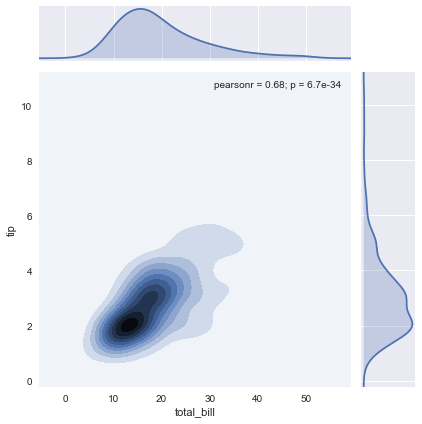

In [8]:
# joint plot - allows you to match up 2 dist plots for bivariate (2 variable) plots

sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')
# kind = define type of interior plot - default is scatter, can choose 'hex', 'reg', 'kde

C:\Users\sholv\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


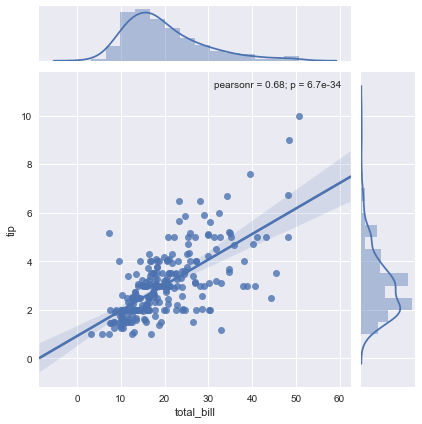

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')

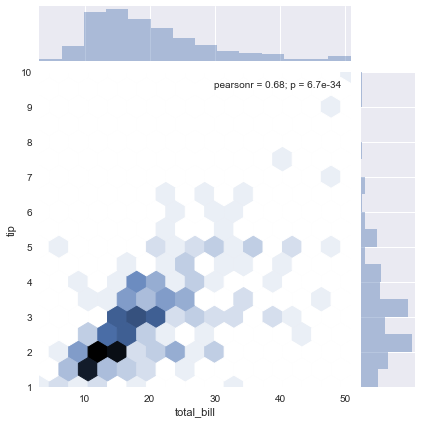

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

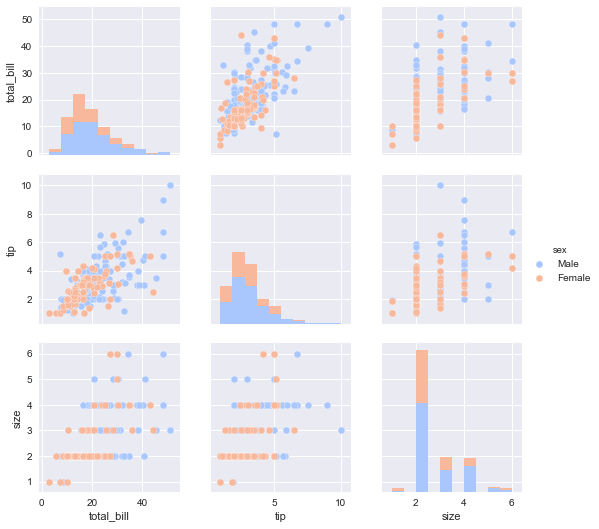

In [14]:
# pair plot - plot pair-wise relationships across an entire dataframe for numeric data types
# basically, will do the joint plot for every possible combination of numeric values in the data frame
# 'hue' column used to pass in an attribute to categorize the values (optional)

sns.pairplot(tips, hue='sex', palette='coolwarm')

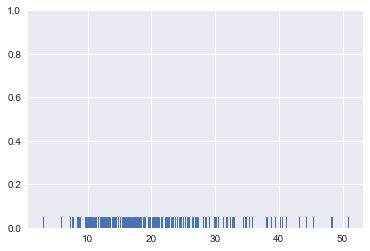

In [16]:
# rug plot - draws a dash mark for every point on the single variable (univariate) distribution
# simple concept, frequency of ticks should coincide to the histogram bar height

sns.rugplot(tips['total_bill'])

(0, 1)

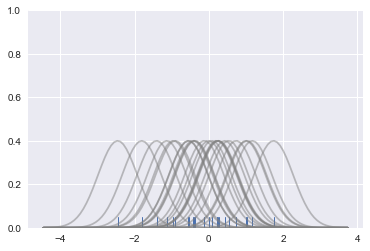

In [17]:
# kde = Kernel Density Estimation plot - basically shows the sum of all the normal distributions

# build a diagram for estimation (copy paste from orig)

# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

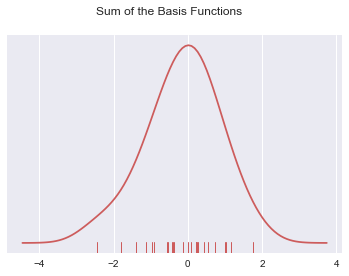

In [18]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

C:\Users\sholv\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


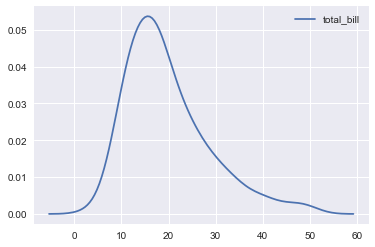

In [19]:
# show just a kde plot for a single variable

sns.kdeplot(tips['total_bill'])